CRIM:城鎮人均犯罪率
ZN:住宅用地超過25000 sq.ft. 的比例
INDUS:城鎮非零售商用土地的比例
CHAS:查理斯河變量（如果邊界是河流，則為1，否則為0）
NOX:一氧化氮濃度
RM:住宅平均房間數
AGE:1940年之前建成的自用房屋比例
DIS:到波士頓五個中心區域的加權距離
RAD:輻射性公路的接近指數
TAX:每10000美元的全值財產稅率
PTRATIO:城鎮師生比例
B	1000*(Bk-0.63)^2，其中Bk為城鎮中黑人的比例
LSTAT:人口中地位低下者的比例
MEDV:自住房的平均房價，以千美元計

In [21]:
#import波士頓房價資料,pandas
from sklearn.datasets import load_boston
import pandas as pd
#load資料庫資料並用boston代名
boston = load_boston()
#用pandas將資料依照原本irisdata和欄位名做成pandas表格 (iris[""],columns=iris[""])
df = pd.DataFrame(boston["data"],
                 columns=boston["feature_names"])

#新增一行
df["ans"] = boston["target"]

#儲存成csv檔(檔名.csv,用萬國編碼,取消前面編號)
df.to_csv("boston.csv", encoding="utf-8", index=False)
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [22]:
#做切割  (91切or82切)
from sklearn.model_selection import train_test_split
#90%題目,10%題目,90%答案,10%答案
x_train, x_test, y_train, y_test= train_test_split(boston["data"],
                                               boston["target"],
                                               test_size=0.1)

In [23]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
                             #深度:出4層解決過擬核問題

In [24]:
#做出模型訓練
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
#reg預測
pre = reg.predict(x_test)
pre

array([16.2       , 21.48716578, 21.48716578, 20.5375    , 21.48716578,
       21.48716578, 33.27777778, 21.48716578, 21.48716578, 21.48716578,
       21.48716578, 33.27777778, 20.5375    , 21.48716578, 21.48716578,
       21.48716578, 21.48716578, 33.27777778, 33.27777778, 20.5375    ,
       50.        , 10.43913043, 16.2       , 21.48716578, 21.48716578,
       21.48716578, 46.94347826, 28.45      , 26.8902439 , 46.94347826,
       26.8902439 , 16.2       , 16.2       , 13.86521739, 33.27777778,
       21.48716578, 21.48716578, 16.2       , 10.43913043, 21.48716578,
       13.86521739, 16.2       , 26.8902439 , 10.43913043, 13.86521739,
       16.2       , 46.94347826, 21.48716578, 33.27777778, 21.48716578,
       33.27777778])

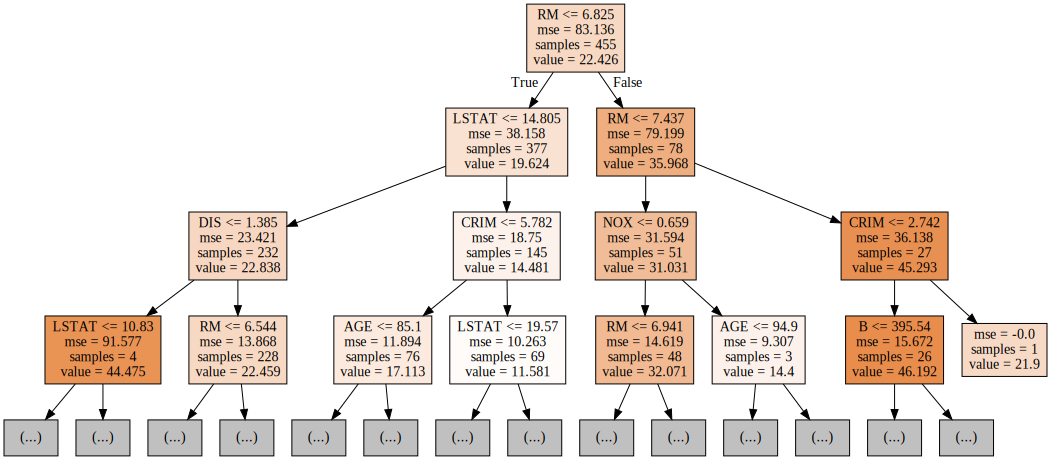

In [26]:
#畫TREE
from sklearn.tree import export_graphviz
import graphviz

#(要處理的目標物, [], filled=True填入顏色)
g = export_graphviz(reg,
                   feature_names=boston["feature_names"],
                   filled=True,
                   max_depth=3)
graphviz.Source(g)

In [27]:
from sklearn.metrics import r2_score
print("預測:",pre)
print("正確:",y_test)
print("R2 score", r2_score(y_test,pre))

預測: [16.2        21.48716578 21.48716578 20.5375     21.48716578 21.48716578
 33.27777778 21.48716578 21.48716578 21.48716578 21.48716578 33.27777778
 20.5375     21.48716578 21.48716578 21.48716578 21.48716578 33.27777778
 33.27777778 20.5375     50.         10.43913043 16.2        21.48716578
 21.48716578 21.48716578 46.94347826 28.45       26.8902439  46.94347826
 26.8902439  16.2        16.2        13.86521739 33.27777778 21.48716578
 21.48716578 16.2        10.43913043 21.48716578 13.86521739 16.2
 26.8902439  10.43913043 13.86521739 16.2        46.94347826 21.48716578
 33.27777778 21.48716578 33.27777778]
正確: [20.5 20.4 21.1 13.2 23.2 24.3 50.  21.2 19.4 10.9 16.  37.2 15.6 20.6
 22.7 25.  19.9 34.6 23.6 19.4 50.   8.8 13.3 23.9 20.1 20.5 50.  14.1
 31.6 35.2 31.1 21.4 13.5 13.8 36.  21.7 22.5 18.1 17.2 22.6 15.1 18.4
 29.4 11.9 17.1 18.8 44.8 20.8 25.  22.8 29.6]
R2 score 0.7330249163751213


In [ ]:
#利用分群為沒分群的項目打上標籤